## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;"> ML Classification Project</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Soldier Race</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:100%; text-align:center; border-radius:10px 10px;">Tayfun Kok </p>

<a id="74"></a>
## <p style="background-color:#1874CD; font-family:newtimeroman; color:#FFF9ED; font-size:130%; text-align:center; border-radius:10px 10px;">Table of Contents</p>

* [Introduction](#0)
* [Importing Related Libraries](#1)
* [Exploratory Data Analysis (EDA)](#2)
* [Data Preprocessing](#3)    
* [Modelling and Model Performance](#4)
* [SMOTE](#5)

# <p style="background-color:#1874CD; font-family:newtimeroman; color:#FFF9ED; font-size:130%; text-align:center; border-radius:10px 10px;">Introduction</p>
<a id="0"></a>
<a href="#74" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# <p style="background-color:#1874CD; font-family:newtimeroman; color:#FFF9ED; font-size:130%; text-align:center; border-radius:10px 10px;">Importing Related Libraries</p>

<a id="1"></a>
<a href="#74" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix, average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

# <p style="background-color:#1874CD; font-family:newtimeroman; color:#FFF9ED; font-size:130%; text-align:center; border-radius:10px 10px;">Exploratory Data Analysis</p>

<a id="2"></a>
<a href="#74" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

## Importing Dataset

**Ingest Data from links below and make a dataframe**
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_male = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr', encoding='latin-1')

In [3]:
df_female= pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')

In [4]:
# df_male = pd.read_csv('ANSUR II MALE Public.csv', encoding='latin-1')
# df_female= pd.read_csv('ANSUR II FEMALE Public.csv')

In [5]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [6]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

## Data Review

In [7]:
print(df_male.shape)
print(df_female.shape)

(4082, 108)
(1986, 108)


In [8]:
df_female.rename({"SubjectId":"subjectid"}, axis=1, inplace=True)

In [9]:
data = pd.concat([df_male,df_female], axis=0, ignore_index=True)
data.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [10]:
data.shape

(6068, 108)

In [11]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [12]:
data.isnull().sum().any() #we have some null values

True

In [13]:
data.duplicated().sum() # we don't have dublicated values. 

0

In [14]:
data["DODRace"].value_counts(normalize=True)

1    0.624918
2    0.213909
3    0.111898
4    0.030982
6    0.009723
5    0.008075
8    0.000494
Name: DODRace, dtype: float64

## Data Cleaning 

In [15]:
drop_list =[]
for col in data:
  if data[col].isnull().sum()>1800:
    print(f"{col} = {data[col].isnull().sum()}")
    drop_list.append(col)
  
  
drop_list 

Ethnicity = 4647


['Ethnicity']

In [16]:
data.drop(drop_list, axis=1, inplace=True)

In [17]:
# we don't need subject column thus we drop it. 
data.drop(columns=["subjectid"], inplace=True)

In [18]:
data.isnull().sum().any()

False

In [19]:
data.shape

(6068, 106)

In [20]:
# to find how many unique values object features have
for col in data.select_dtypes("object"):
  print(f"{col} has {data[col].nunique()} unique value")

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 285 unique value
SubjectsBirthLocation has 152 unique value
WritingPreference has 3 unique value


In [21]:
data.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8])

In [22]:
data["DODRace"] = data.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})

In [23]:
data.groupby(["Component"])["DODRace"].value_counts(normalize=True)

Component            DODRace         
Army National Guard  White               0.685007
                     Black               0.184269
                     Hispanic            0.093427
                     Asian               0.022157
                     Native American     0.008863
                     Pacific Islander    0.006278
Army Reserve         White               0.518182
                     Black               0.236364
                     Hispanic            0.186364
                     Asian               0.040909
                     Pacific Islander    0.013636
                     Native American     0.004545
Regular Army         White               0.580573
                     Black               0.237898
                     Hispanic            0.122611
                     Asian               0.037898
                     Pacific Islander    0.012420
                     Native American     0.007643
                     Other               0.000955
Name: DODRac

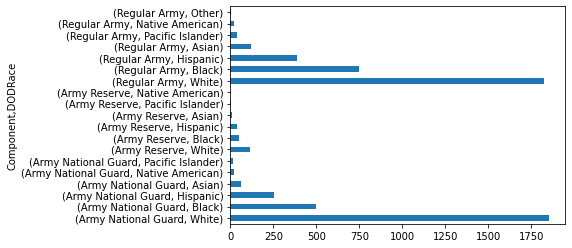

In [24]:
data.groupby(["Component"])["DODRace"].value_counts().plot(kind="barh");

In [25]:
data.groupby(["Component", "Branch"])["DODRace"].value_counts(normalize=True)

Component            Branch                  DODRace         
Army National Guard  Combat Arms             White               0.771995
                                             Black               0.097893
                                             Hispanic            0.091698
                                             Asian               0.022305
                                             Native American     0.011152
                                             Pacific Islander    0.004957
                     Combat Service Support  White               0.643509
                                             Black               0.218947
                                             Hispanic            0.099649
                                             Asian               0.023158
                                             Pacific Islander    0.007719
                                             Native American     0.007018
                     Combat Support          White

In [26]:
# we don't need these following columns for our models. Thus, we drop them. 
drop_list1 = [
    "Date", "Installation", "Component", "Branch", "PrimaryMOS",
    "Weightlbs", "Heightin"   
]

data.drop(drop_list1, axis=1, inplace=True)

In [27]:
data.shape

(6068, 99)

In [28]:
data.columns

Index(['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength',
       'heel

In [29]:
data.SubjectNumericRace.value_counts() #SubjectNumericRace column has too many unique values. Thus, we drop it 

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: SubjectNumericRace, dtype: int64

In [30]:
data.drop("SubjectNumericRace",axis=1,inplace=True)

In [31]:
data.shape

(6068, 98)

In [32]:
data.DODRace.value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

In [33]:
# We dont have enough data for asian, pasific Islander, Native American and Other races. Thus, we drop them.  
data = data[(data["DODRace"] == "White") | (data["DODRace"] == "Black") |
                (data["DODRace"] == "Hispanic")]
data.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,White,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand


In [34]:
data.reset_index(drop=True, inplace=True)

In [35]:
data.shape

(5769, 98)

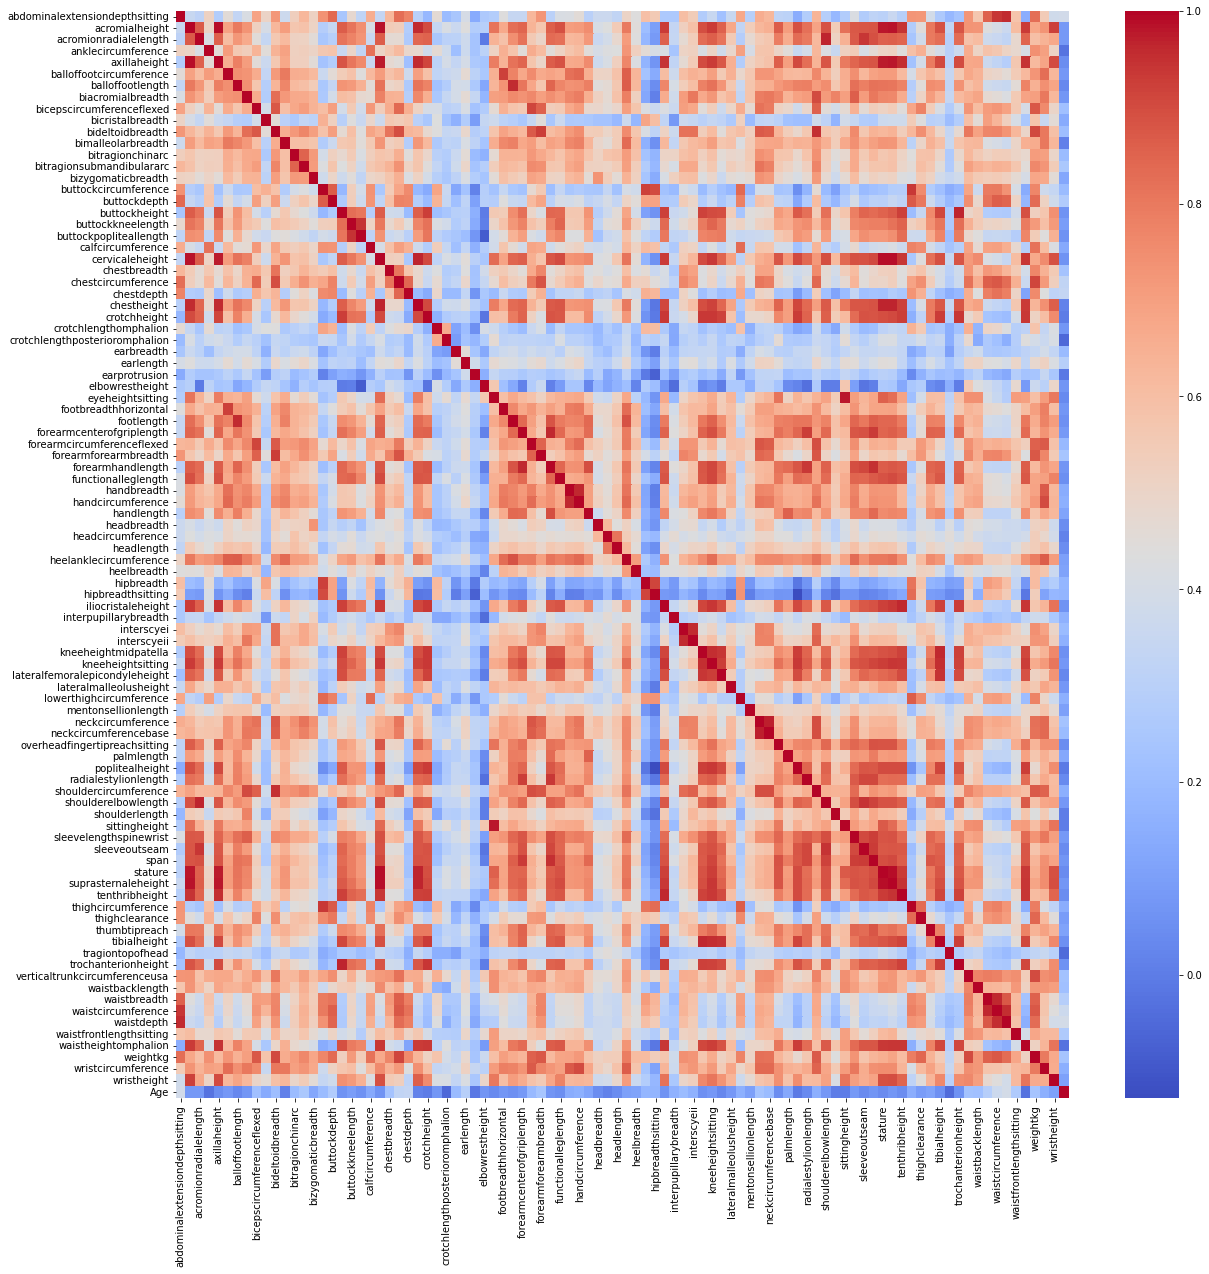

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cmap ="coolwarm");

# <p style="background-color:#1874CD; font-family:newtimeroman; color:#FFF9ED; font-size:130%; text-align:center; border-radius:10px 10px;">Data Preprocessing </p>

<a id="3"></a>
<a href="#74" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

In [37]:
X = data.drop("DODRace",axis=1)
y = data.DODRace

In [38]:
X.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,21,Right hand


In [39]:
y.value_counts(normalize=True)

White       0.657306
Black       0.224996
Hispanic    0.117698
Name: DODRace, dtype: float64

In [40]:
cat = X.select_dtypes("object").columns
cat 

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [42]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


In [43]:
y_train.value_counts(normalize=True)

White       0.657421
Black       0.224919
Hispanic    0.117660
Name: DODRace, dtype: float64

In [44]:
y_test.value_counts(normalize=True)

White       0.656846
Black       0.225303
Hispanic    0.117851
Name: DODRace, dtype: float64

In [45]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

**User Defined Functions**

In [46]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

# <p style="background-color:#1874CD; font-family:newtimeroman; color:#FFF9ED; font-size:130%; text-align:center; border-radius:10px 10px;"> Modelling and Model Performance</p>
<a id="4"></a>
<a href="#74" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

##  Logistic Regression

**Vanilla Logistic Model**

In [47]:
log_model=LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101)

In [48]:
from sklearn.pipeline import Pipeline
operations = [("OneHotEncoder", column_trans), ("log",log_model)]
pipe_log_model = Pipeline(steps=operations)

In [49]:
pipe_log_model.fit(X_train,y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [50]:
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[239  14   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   37   30]
 [  20  456   67]
 [  56  363 2615]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.88      4615



In [51]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [52]:
operations = [("OneHotEncoder", column_trans), ("log",log_model)]

model = Pipeline(steps=operations)
# we make cross validation with respect to scores of "Hispanic" 
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.599420
test_precision_Hispanic    0.490303
test_recall_Hispanic       0.773333
dtype: float64

**Logistic Regression GridsearchCV**

In [53]:
# Our data is unbalanced. Thus, recall score is important for
# We want to increase the socre of "Hispanic" class 
# Thus, we make grid search with respect to the recall score of "Hispanic" class. 
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [54]:
param_grid = {
    "log__C": [1, 5, 10],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [55]:
log_model=LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101)

In [56]:
operations = [("OneHotEncoder", column_trans), ("log", log_model)]

model =Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1, cv=5)

In [57]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [1, 5, 10], 'log__penalty': ['l1

In [58]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=10000, random_state=101))])

In [59]:
log_model_grid.best_params_

{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [60]:
log_model_grid.best_score_

0.7716106014271152

In [61]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[239  14   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   37   30]
 [  20  456   67]
 [  56  363 2615]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.88      4615



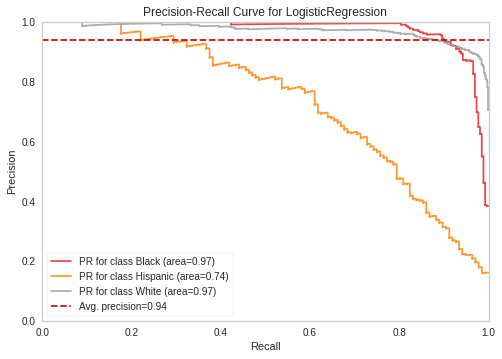

In [62]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("OneHotEncoder", column_trans), ("log",log_model)]

model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [63]:
viz.score_#["Hispanic"]

{'Black': 0.9739679676260993,
 'Hispanic': 0.7356006947122873,
 'White': 0.9714188014722409,
 'micro': 0.9382585784167999}

In [64]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_AP, log_f1, log_recall

(0.7356006947122873, array([0.63428571]), array([0.81617647]))

##  Support Vector Machines

**Vanilla SVC model** 

In [65]:
svc_model=SVC(class_weight="balanced",random_state=101)

In [66]:
operations_svc = [("OneHotEncoder", column_trans), ("svc",svc_model )]

pipe_svc_model = Pipeline(steps=operations_svc)

In [67]:
pipe_svc_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('svc', SVC(class_weight='balanced', random_state=101))])

In [68]:
eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[240  12   8]
 [  5 111  20]
 [ 20 109 629]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.48      0.82      0.60       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 956   42   40]
 [  23  456   64]
 [  54  426 2554]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [69]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic           0.567945
test_precision_Hispanic    0.452935
test_recall_Hispanic       0.762368
dtype: float64

**SVC Model GridsearchCV**

In [70]:
param_grid = {
    'svc__C': [1,2],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]
}

In [71]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", svc_model)]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

In [72]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispa

In [73]:
svm_model_grid.best_params_

{'svc__C': 2, 'svc__gamma': 'scale'}

In [74]:
svm_model_grid.best_score_

0.764186204553177

In [75]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[240  10  10]
 [  5 111  20]
 [ 22  94 642]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 970   35   33]
 [  16  466   61]
 [  52  373 2609]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93      1038
    Hispanic       0.53      0.86      0.66       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



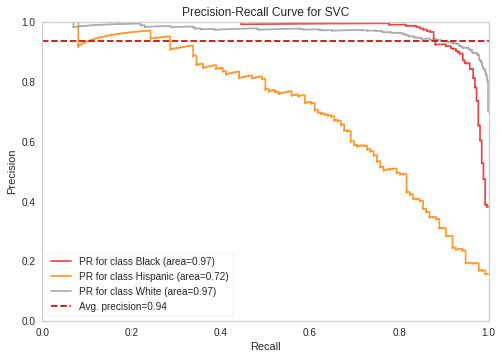

In [76]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(C=2, class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [77]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_AP, svc_f1, svc_recall

(0.7182860644867964, array([0.63247863]), array([0.81617647]))

##  Random Forest

In [78]:
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [79]:
# we don't need scaling for tree base models. 
# Also we apply OrdinalEncoder to catagorical variables for tree base models. 

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

**Vanilla Random Forest**

In [80]:
rf_model=RandomForestClassifier(class_weight="balanced", random_state=101)

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

operations_rf = [("OrdinalEncoder", column_trans), ("RF_model",rf_model)]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [82]:
# it seems that there is overfitting on our model. 
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[191   0  69]
 [ 10   6 120]
 [ 10   2 746]]
              precision    recall  f1-score   support

       Black       0.91      0.73      0.81       260
    Hispanic       0.75      0.04      0.08       136
       White       0.80      0.98      0.88       758

    accuracy                           0.82      1154
   macro avg       0.82      0.59      0.59      1154
weighted avg       0.82      0.82      0.77      1154


Train_Set
[[1038    0    0]
 [   0  542    1]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [83]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model",rf_model)]

model = Pipeline(steps=operations_rf)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic           0.049538
test_precision_Hispanic    0.777143
test_recall_Hispanic       0.025807
dtype: float64

**Random Forest GridsearchCV**

In [84]:
param_grid = {'RF_model__n_estimators':[400,500],
             'RF_model__max_depth':[2,3],
             'RF_model__min_samples_split':[18,20,22],
             'RF_model__max_features': ['auto', None, 15, 20]}
             

In [85]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model",rf_model)]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1)

In [86]:
rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__max_features': ['auto', None, 15, 20],

In [87]:
rf_grid_model.best_params_

{'RF_model__max_depth': 2,
 'RF_model__max_features': 'auto',
 'RF_model__min_samples_split': 18,
 'RF_model__n_estimators': 400}

In [88]:
rf_grid_model.best_score_

0.6095820591233435

In [89]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[174  50  36]
 [ 16  76  44]
 [ 91 244 423]]
              precision    recall  f1-score   support

       Black       0.62      0.67      0.64       260
    Hispanic       0.21      0.56      0.30       136
       White       0.84      0.56      0.67       758

    accuracy                           0.58      1154
   macro avg       0.56      0.60      0.54      1154
weighted avg       0.72      0.58      0.62      1154


Train_Set
[[ 702  204  132]
 [  45  346  152]
 [ 246 1105 1683]]
              precision    recall  f1-score   support

       Black       0.71      0.68      0.69      1038
    Hispanic       0.21      0.64      0.31       543
       White       0.86      0.55      0.67      3034

    accuracy                           0.59      4615
   macro avg       0.59      0.62      0.56      4615
weighted avg       0.75      0.59      0.64      4615



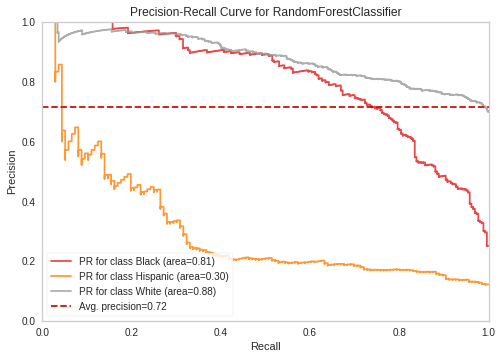

In [90]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                    max_depth=2, n_estimators=400, random_state=101))]

model = Pipeline(steps=operations_rf)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [91]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_AP, rf_f1, rf_recall

(0.30004910413998054, array([0.30039526]), array([0.55882353]))

##  XGBoost

**Vanilla XGBoost Model**

In [92]:
#!pip install xgboost==0.90

In [93]:
import xgboost as xgb

In [94]:
xgb_model=XGBClassifier(random_state=101)

In [95]:
# Similarly we use OrdinalEncoder and we don't apply scaling. 
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model",xgb_model)]

pipe_xgb_model = Pipeline(steps=operations_xgb)

pipe_xgb_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(objective='multi:softprob', random_state=101))])

In [96]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([2.8330264 , 0.50703142, 0.50703142, ..., 0.50703142, 1.4820167 ,
       0.50703142])

In [97]:
comp = pd.DataFrame(classes_weights)

comp["label"] = y_train.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label     0       
Black     1.482017    1038
Hispanic  2.833026     543
White     0.507031    3034
Name: 0, dtype: int64

In [98]:
pipe_xgb_model.fit(X_train,y_train, XGB_model__sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. 
# Therefore, we need to assign the weight of each class to its instances, which is the same thing.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(objective='multi:softprob', random_state=101))])

In [99]:
eval_metric(pipe_xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[229  11  20]
 [ 11  89  36]
 [ 45 104 609]]
              precision    recall  f1-score   support

       Black       0.80      0.88      0.84       260
    Hispanic       0.44      0.65      0.52       136
       White       0.92      0.80      0.86       758

    accuracy                           0.80      1154
   macro avg       0.72      0.78      0.74      1154
weighted avg       0.83      0.80      0.81      1154


Train_Set
[[ 977   27   34]
 [  15  471   57]
 [  79  323 2632]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.93      1038
    Hispanic       0.57      0.87      0.69       543
       White       0.97      0.87      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.82      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



In [100]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model",xgb_model)]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5,
                        fit_params={"XGB_model__sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic           0.501299
test_precision_Hispanic    0.427803
test_recall_Hispanic       0.605878
dtype: float64

**XGBoost Model GridsearchCV**

In [101]:
param_grid = {"XGB_model__n_estimators":[50, 100],
              'XGB_model__max_depth':[1,2],
              "XGB_model__learning_rate": [0.1, 0.3],
              "XGB_model__subsample":[0.8, 1],
              }

In [102]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", xgb_model)]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [103]:
xgb_grid_model.best_params_

{'XGB_model__learning_rate': 0.3,
 'XGB_model__max_depth': 1,
 'XGB_model__n_estimators': 100,
 'XGB_model__subsample': 0.8}

In [104]:
xgb_grid_model.best_score_

0.6409106354060483

In [105]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[222  20  18]
 [ 15  86  35]
 [ 55 138 565]]
              precision    recall  f1-score   support

       Black       0.76      0.85      0.80       260
    Hispanic       0.35      0.63      0.45       136
       White       0.91      0.75      0.82       758

    accuracy                           0.76      1154
   macro avg       0.68      0.74      0.69      1154
weighted avg       0.81      0.76      0.77      1154


Train_Set
[[ 908   69   61]
 [  38  402  103]
 [ 136  524 2374]]
              precision    recall  f1-score   support

       Black       0.84      0.87      0.86      1038
    Hispanic       0.40      0.74      0.52       543
       White       0.94      0.78      0.85      3034

    accuracy                           0.80      4615
   macro avg       0.73      0.80      0.74      4615
weighted avg       0.85      0.80      0.81      4615



In [109]:
#!pip install scikit-plot

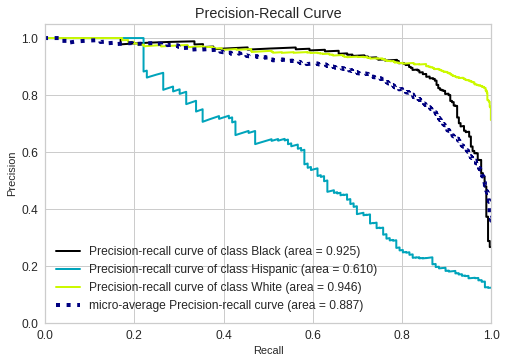

In [110]:

from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


perations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(learning_rate=0.3, max_depth=1,
                            random_state=101, subsample=0.8))]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)
#y_pred = model.predict(X_test)
#Plot metrics 
#plot_roc(y_test, y_score)
#plt.show()
    
plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [111]:
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.6103270539987586

In [112]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])
xgb_AP, xgb_f1, xgb_recall

(0.6103270539987586, array([0.45263158]), array([0.63235294]))

## Comparing Models

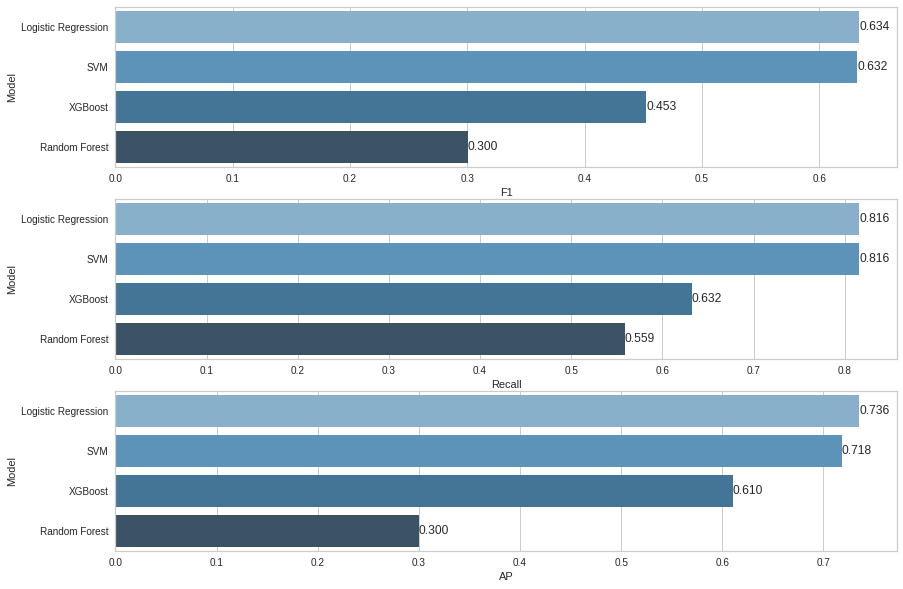

In [113]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

## Before the Deployment 

**Logistic regression gives better recall score. We apply logistic regression to all dataset and we give two examples.**

In [123]:
column_trans_final = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

operations_final = [("OneHotEncoder",column_trans_final),("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

final_model = Pipeline(steps=operations_final)

In [124]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [125]:
X.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age
count,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.00000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000
mean,247.254290,1408.630265,328.071590,225.201768,1301.902583,244.408043,195.118911,399.706015,341.663027,274.903449,491.454845,72.335413,324.962212,306.677760,139.529381,1022.059456,242.234356,872.112845,610.449991,498.331773,386.316519,1479.952158,283.232623,1024.206622,252.322586,1254.290172,827.105738,622.693708,351.880222,35.175420,62.606171,22.227249,240.553302,786.399203,98.915063,263.512394,339.458832,295.661640,553.098284,467.898769,1104.347201,85.098111,204.215635,189.574796,152.043682,570.424337,196.640839,333.274918,70.834113,348.930837,386.417923,1042.152366,632.534928,412.773964,433.017334,476.665280,541.376668,484.316693,69.76183,406.943144,119.601664,376.127578,414.554516,1390.525048,114.106604,417.227076,259.757670,1131.214422,354.805166,145.202288,898.592477,868.361068,578.013001,1766.951118,1716.938984,1405.392442,1101.631479,623.583637,176.696481,791.044548,459.389149,129.580343,884.659386,1632.470966,460.990293,318.409950,916.817126,230.459178,377.352054,1033.591090,800.981106,169.308372,831.334547,29.776391
std,37.457748,78.303123,20.444554,15.965783,71.260913,16.803556,13.379000,30.124094,41.270615,19.239580,42.011888,5.326965,17.050426,20.818789,7.248670,75.952953,26.4

In [126]:
mean_human = X.describe(include="all").loc["mean"]
mean_human

abdominalextensiondepthsitting      247.25429
acromialheight                    1408.630265
acromionradialelength               328.07159
anklecircumference                 225.201768
axillaheight                      1301.902583
balloffootcircumference            244.408043
balloffootlength                   195.118911
biacromialbreadth                  399.706015
bicepscircumferenceflexed          341.663027
bicristalbreadth                   274.903449
bideltoidbreadth                   491.454845
bimalleolarbreadth                  72.335413
bitragionchinarc                   324.962212
bitragionsubmandibulararc           306.67776
bizygomaticbreadth                 139.529381
buttockcircumference              1022.059456
buttockdepth                       242.234356
buttockheight                      872.112845
buttockkneelength                  610.449991
buttockpopliteallength             498.331773
calfcircumference                  386.316519
cervicaleheight                   

In [127]:
mean_human["Gender"] = "Male"
mean_human["SubjectsBirthLocation"] = "California"
mean_human["WritingPreference"] = "Right hand"

In [128]:
pd.DataFrame(mean_human).T

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
mean,247.25429,1408.630265,328.07159,225.201768,1301.902583,244.408043,195.118911,399.706015,341.663027,274.903449,491.454845,72.335413,324.962212,306.67776,139.529381,1022.059456,242.234356,872.112845,610.449991,498.331773,386.316519,1479.952158,283.232623,1024.206622,252.322586,1254.290172,827.105738,622.693708,351.880222,35.17542,62.606171,22.227249,240.553302,786.399203,98.915063,263.512394,339.458832,295.66164,553.098284,467.898769,1104.347201,85.098111,204.215635,189.574796,152.043682,570.424337,196.640839,333.274918,70.834113,348.930837,386.417923,1042.152366,632.534928,412.773964,433.017334,476.66528,541.376668,484.316693,69.76183,406.943144,119.601664,376.127578,414.554516,1390.525048,114.106604,417.227076,259.75767,1131.214422,354.805166,145.202288,898.592477,868.361068,578.013001,1766.951118,1716.938984,1405.392442,1101.631479,623.583637,176.696481,791.044548,459.389149,129.580343,884.659386,1632.470966,460.990293,318.40995,916.817126,230.459178,377.352054,1033.59109,800.981106,169.308372,831.334547,Male,California,29.776391,Right hand


In [129]:
final_model.predict(pd.DataFrame(mean_human).T)

array(['Hispanic'], dtype=object)

In [130]:
y[201]

'Hispanic'

In [131]:
final_model.predict(X.loc[[201]])

array(['Hispanic'], dtype=object)

# <p style="background-color:#1874CD; font-family:newtimeroman; color:#FFF9ED; font-size:130%; text-align:center; border-radius:10px 10px;">SMOTE</p>

<a id="5"></a>
<a href="#74" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

##  Smote implement (Synthetic Minority Oversampling Technique)

In [141]:
#!pip install imblearn

In [142]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

## Logistic Regression Over/Under Sampling

In [143]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [144]:
over = SMOTE(sampling_strategy={"Hispanic": 1038})
under = RandomUnderSampler(sampling_strategy={"White": 1038})

In [145]:
operations = [("OneHotEncoder",column_trans), ('o', over), ('u', under), 
              ("log", LogisticRegression(max_iter=10000,random_state=101))] #("scaler", MinMaxScaler())

In [146]:
smote_pipeline = imbpipeline(steps=operations)

In [147]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1038})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 1038})),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

In [148]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[244   9   7]
 [  5 112  19]
 [ 29  86 643]]
              precision    recall  f1-score   support

       Black       0.88      0.94      0.91       260
    Hispanic       0.54      0.82      0.65       136
       White       0.96      0.85      0.90       758

    accuracy                           0.87      1154
   macro avg       0.79      0.87      0.82      1154
weighted avg       0.89      0.87      0.87      1154


Train_Set
[[ 971   34   33]
 [  27  442   74]
 [  67  347 2620]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.92      1038
    Hispanic       0.54      0.81      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.83      4615
weighted avg       0.90      0.87      0.88      4615



In [149]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.592678
test_precision_Hispanic    0.484169
test_recall_Hispanic       0.765926
dtype: float64

**THE END**